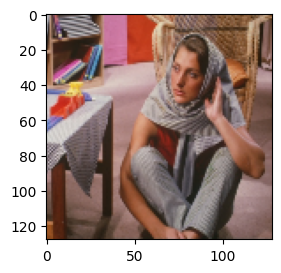

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
A = cv2.imread('./barbara.jpg')
A = cv2.resize(A, (128, 128))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
print(A.shape)

(128, 128, 3)


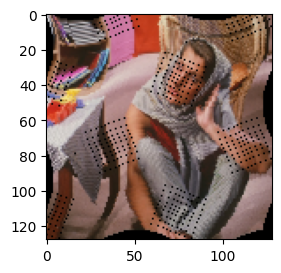

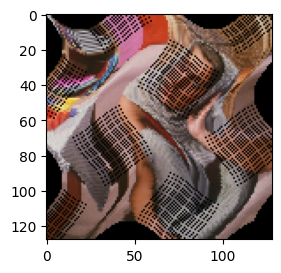

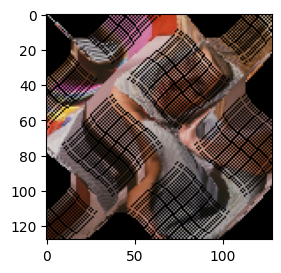

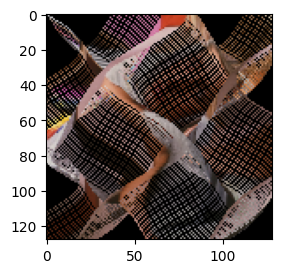

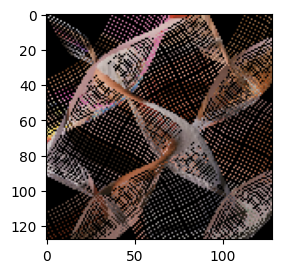

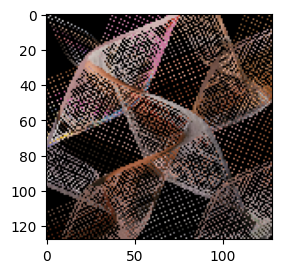

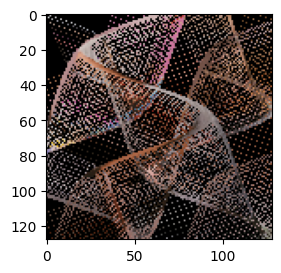

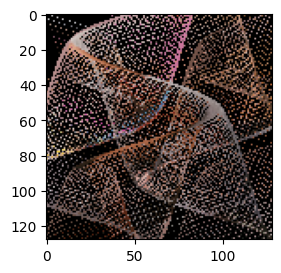

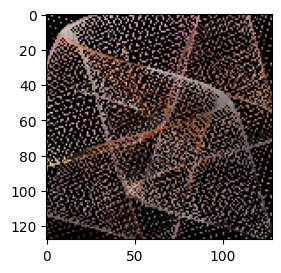

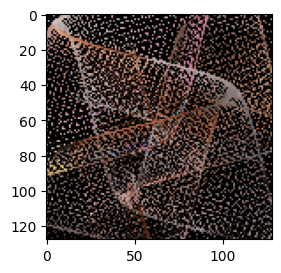

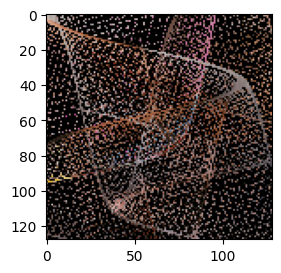

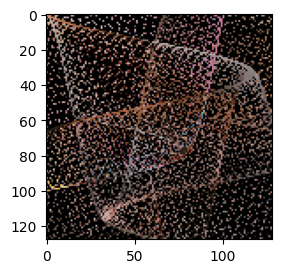

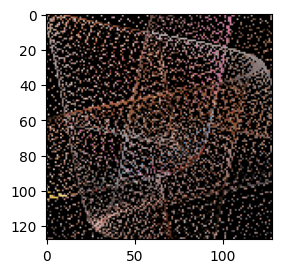

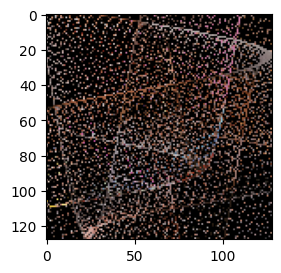

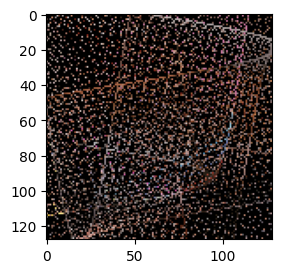

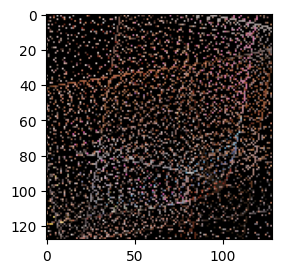

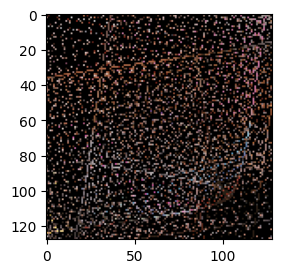

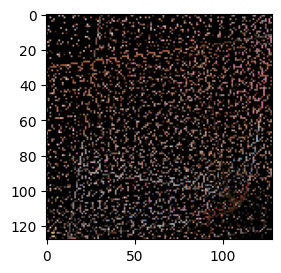

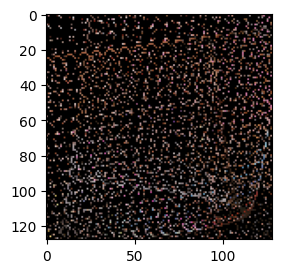

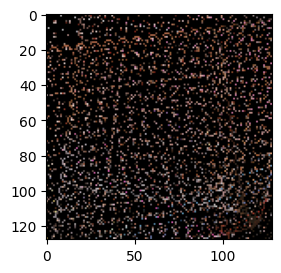

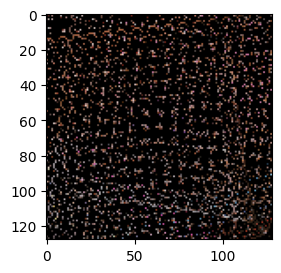

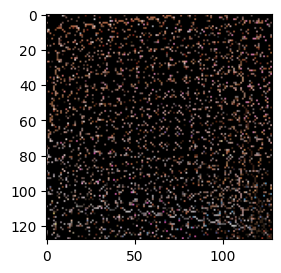

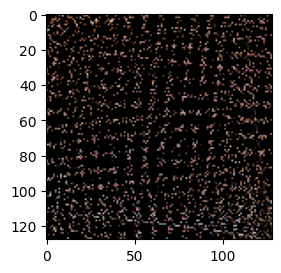

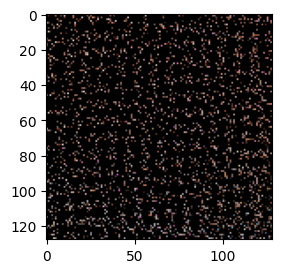

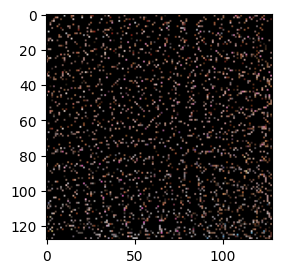

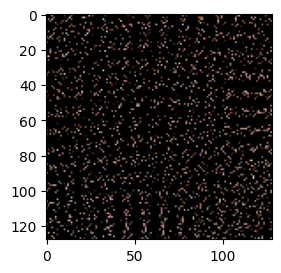

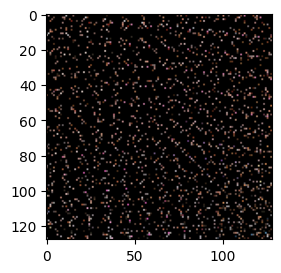

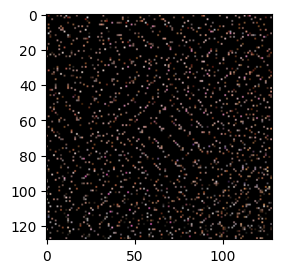

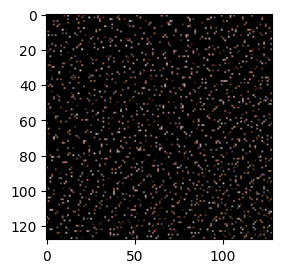

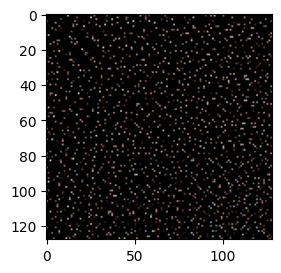

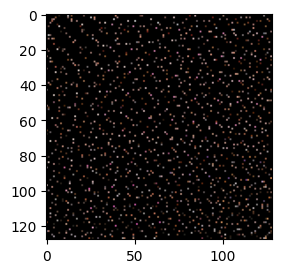

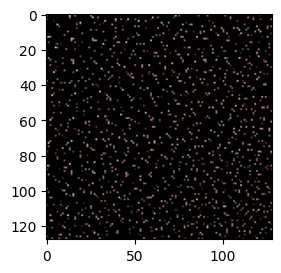

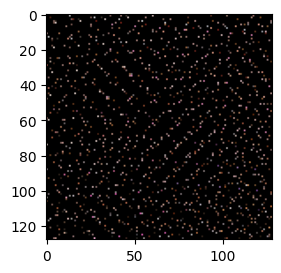

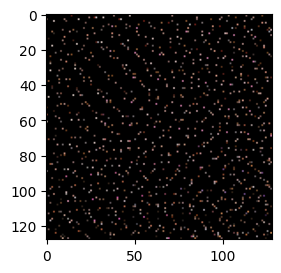

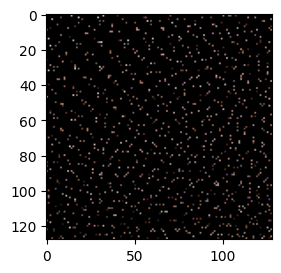

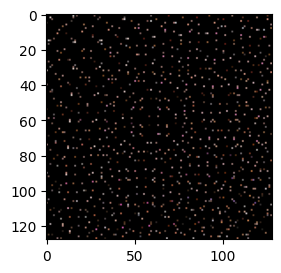

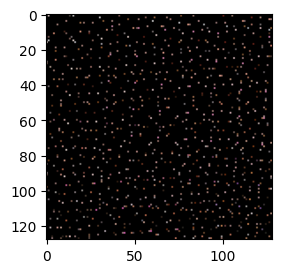

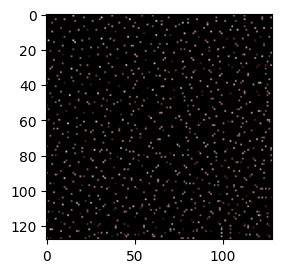

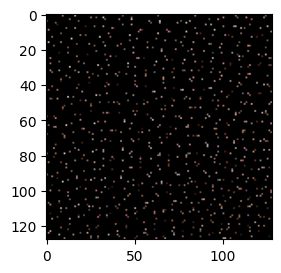

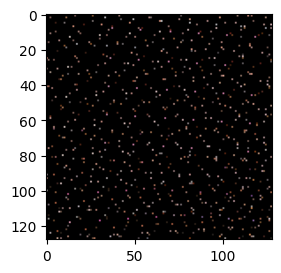

In [6]:
# Extract image dimensions
m, n, r = A.shape

# Periods and amplitudes
Lx = 75
Ly = 75

# Initialize the output image array
Y = np.zeros((m, n, r, 41), dtype=np.uint8)

# First frame
Y[:, :, :, 0] = A

for k in range(5, 201, 5):
    Ax = k
    Ay = k

    # Generate a blank image
    B = np.zeros((m, n, r), dtype=np.uint8)
    for x in range(m):
        for y in range(n):
            xnew = int((x + Ax * np.sin(2 * np.pi * y / Lx)) % m)
            xaux = int(x + Ax * np.sin(2 * np.pi * y / Lx))
            ynew = int((y + Ay * np.sin(2 * np.pi * x / Ly)) % n)
            yaux = int(y + Ay * np.sin(2 * np.pi * x / Ly))
            if xnew == xaux and ynew == yaux:
                B[xnew, ynew, :] = A[x, y, :]

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
    plt.show(block=False)
    plt.pause(0.1)
    Y[:, :, :, k // 5] = B

In [ ]:
# Create a video (uncomment this section if needed)
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# video = cv2.VideoWriter('yourvideo.avi', fourcc, 30, (n, m))
# for i in range(Y.shape[3]):
#     C = Y[:, :, :, i]
#     for j in range(7):
#         video.write(C)
# video.release()
